using Z score in the outlier detection


In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv('heights2.csv')
df

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796
...,...,...
9995,Female,66.172652
9996,Female,67.067155
9997,Female,63.867992
9998,Female,69.034243


Text(0.5, 0, 'Heihgt(inches)')

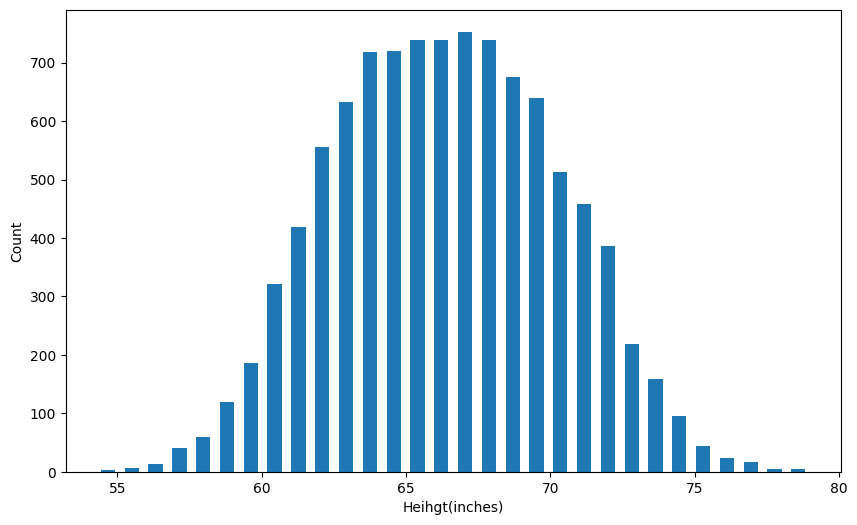

In [3]:
plt.hist(df.height, bins= 30 , rwidth= 0.6)
plt.ylabel ('Count')
plt.xlabel('Heihgt(inches)')


from scipy.stats import norm
import numpy as np 
rng = np.arange(df.height.min(), df.height.max(), 0.1 )
norm.pdf(x) = exp(-x**2/2)/sqrt(2*pi)


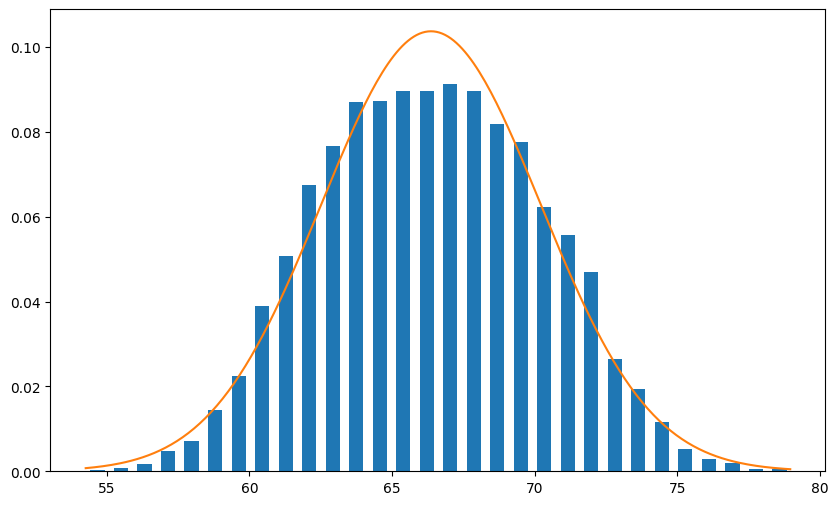

In [11]:
plt.hist(df.height, bins= 30 , rwidth= 0.6, density=True)
plt.plot(rng, norm.pdf(rng, df.height.mean(), df.height.std()))


In [52]:
df.height.mean()

66.367559754866

In [58]:
df.height.std()

3.847528120795573

In [12]:
upperLimit = df.height.mean() + 3 * df.height.std()
upperLimit

77.91014411725271

In [13]:
lowerLimit = df.height.mean()  - 3 * df.height.std()
lowerLimit

54.824975392479274

In [15]:
df[(df.height > upperLimit) | (df.height < lowerLimit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [16]:

df1 = df[(df.height < upperLimit) & (df.height > lowerLimit)]
df1.shape

(9993, 2)

z score = ((x - mean()) / std())

In [23]:
df['zscore'] = (df.height - df.height.mean()) / df.height.std()

In [24]:
df[df.zscore > 3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [26]:
df[(df.zscore < -3) | (df.zscore > 3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [27]:
df_no_outliers = df[(df.zscore > -3) & (df.zscore < 3)]
df_no_outliers

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
...,...,...,...
9995,Female,66.172652,-0.050658
9996,Female,67.067155,0.181830
9997,Female,63.867992,-0.649655
9998,Female,69.034243,0.693090
